<a href="https://colab.research.google.com/github/aishwarya071/aishwarya071.github.io/blob/master/exp0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"/content/heartprediction.csv")
print(df)
df.loc[303]=[30,1,np.nan,120,np.nan,np.nan,1,158,0,0.8,2,np.nan,2,1]
df.loc[304]=[44,1,np.nan,120,263,np.nan,1,np.nan,0,0,np.nan,0,3,1]
print("Null values in each column")
df.isnull().sum(axis=0)

     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      

age         0
sex         0
cp          2
trestbps    0
chol        1
fbs         2
restecg     0
thalach     1
exang       0
oldpeak     0
slope       1
ca          1
thal        0
target      0
dtype: int64

In [2]:
df.fillna(method='pad')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0
302,57.0,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2.0,0.0
303,30.0,1.0,1.0,120.0,236.0,0.0,1.0,158.0,0.0,0.8,2.0,1.0,2.0,1.0


In [3]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0.0,cp_1.0,cp_2.0,cp_3.0,thal_0.0,thal_1.0,thal_2.0,thal_3.0,slope_0.0,slope_1.0,slope_2.0
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,0,0,0,1,0,1,0,0,1,0,0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,0,0,1,0,0,0,1,0,1,0,0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,0,1,0,0,0,0,1,0,0,0,1
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,0,1,0,0,0,0,1,0,0,0,1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,1,0,0,0,0,0,1,0,0,0,1


In [4]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0.0,cp_1.0,cp_2.0,cp_3.0,thal_0.0,thal_1.0,thal_2.0,thal_3.0,slope_0.0,slope_1.0,slope_2.0
0,63.0,1.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,1.0,0,0,0,1,0,1,0,0,1,0,0
1,37.0,1.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,1.0,0,0,1,0,0,0,1,0,1,0,0
2,41.0,0.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,0.0,1.0,0,1,0,0,0,0,1,0,0,0,1
3,56.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,0.0,1.0,0,1,0,0,0,0,1,0,0,0,1
4,57.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,0.0,1.0,1,0,0,0,0,0,1,0,0,0,1


In [7]:
df.target.value_counts()

1.0    167
0.0    138
Name: target, dtype: int64

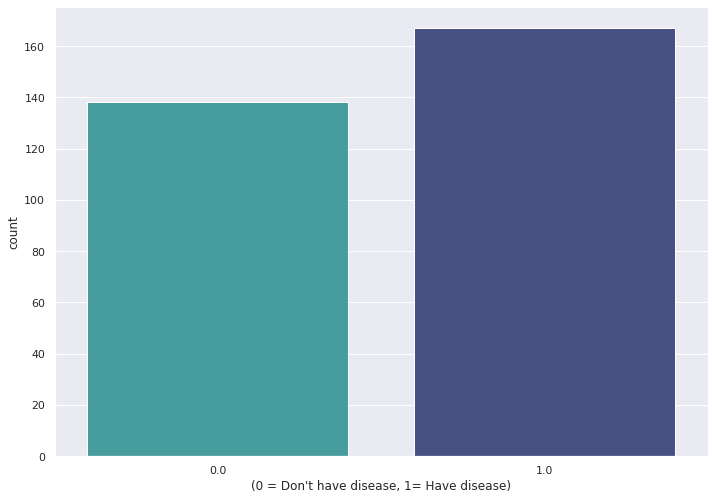

In [21]:
sns.countplot(x="target", data=df, palette="mako_r")
plt.xlabel("(0 = Don't have disease, 1= Have disease)")
plt.show()